# 🍸 Cocktail GNN - Exploration des données

Premier notebook pour explorer les données de cocktails récupérées.

In [13]:
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.collectors import TheCocktailDBCollector, CocktailDataProcessor

plt.style.use('default')
sns.set_palette("husl")

## 1. Collecte des données

In [15]:
# Test rapide de l'API
collector = TheCocktailDBCollector()

# Récupérer quelques cocktails pour tester
sample_cocktails = collector.get_all_cocktails ()
print(f"Trouvé {len(sample_cocktails)} cocktails")

# Regarder la structure d'un cocktail
if sample_cocktails:
    print("\nStructure d'un cocktail:")
    for key in sample_cocktails[0].keys():
        print(f"- {key}")

INFO:src.data.collectors:Trouvé 25 cocktails pour la lettre 'a'
INFO:src.data.collectors:Trouvé 25 cocktails pour la lettre 'b'
INFO:src.data.collectors:Trouvé 25 cocktails pour la lettre 'c'
INFO:src.data.collectors:Trouvé 18 cocktails pour la lettre 'd'
INFO:src.data.collectors:Trouvé 10 cocktails pour la lettre 'e'
INFO:src.data.collectors:Trouvé 24 cocktails pour la lettre 'f'
INFO:src.data.collectors:Trouvé 25 cocktails pour la lettre 'g'
INFO:src.data.collectors:Trouvé 17 cocktails pour la lettre 'h'
INFO:src.data.collectors:Trouvé 11 cocktails pour la lettre 'i'
INFO:src.data.collectors:Trouvé 13 cocktails pour la lettre 'j'
INFO:src.data.collectors:Trouvé 16 cocktails pour la lettre 'k'
INFO:src.data.collectors:Trouvé 22 cocktails pour la lettre 'l'
INFO:src.data.collectors:Trouvé 25 cocktails pour la lettre 'm'
INFO:src.data.collectors:Trouvé 6 cocktails pour la lettre 'n'
INFO:src.data.collectors:Trouvé 14 cocktails pour la lettre 'o'
INFO:src.data.collectors:Trouvé 25 cockta

Trouvé 426 cocktails

Structure d'un cocktail:
- idDrink
- strDrink
- strDrinkAlternate
- strTags
- strVideo
- strCategory
- strIBA
- strAlcoholic
- strGlass
- strInstructions
- strInstructionsES
- strInstructionsDE
- strInstructionsFR
- strInstructionsIT
- strInstructionsZH-HANS
- strInstructionsZH-HANT
- strDrinkThumb
- strIngredient1
- strIngredient2
- strIngredient3
- strIngredient4
- strIngredient5
- strIngredient6
- strIngredient7
- strIngredient8
- strIngredient9
- strIngredient10
- strIngredient11
- strIngredient12
- strIngredient13
- strIngredient14
- strIngredient15
- strMeasure1
- strMeasure2
- strMeasure3
- strMeasure4
- strMeasure5
- strMeasure6
- strMeasure7
- strMeasure8
- strMeasure9
- strMeasure10
- strMeasure11
- strMeasure12
- strMeasure13
- strMeasure14
- strMeasure15
- strImageSource
- strImageAttribution
- strCreativeCommonsConfirmed
- dateModified


## 2. Nettoyage et preprocessing

In [16]:
# Nettoyer les données
processor = CocktailDataProcessor()
cocktails_df = processor.clean_thecocktaildb_data(sample_cocktails)

print(f"DataFrame créé avec {len(cocktails_df)} cocktails")
print("\nPremières lignes:")
cocktails_df.head()

INFO:src.data.collectors:Nettoyé 426 cocktails


DataFrame créé avec 426 cocktails

Premières lignes:


,id,name,category,alcoholic,glass,instructions,image_url,ingredients,measurements
0,17222,A1,Cocktail,Alcoholic,Cocktail glass,"Pour all ingredients into a cocktail shaker, m...",https://www.thecocktaildb.com/images/media/dri...,"[gin, grand marnier, lemon juice, grenadine]","[1 3/4 shot, 1 Shot, 1/4 Shot, 1/8 Shot]"
1,13501,ABC,Shot,Alcoholic,Shot glass,Layered in a shot glass.,https://www.thecocktaildb.com/images/media/dri...,"[amaretto, baileys irish cream, cognac]","[1/3, 1/3, 1/3]"
2,17225,Ace,Cocktail,Alcoholic,Martini Glass,Shake all the ingredients in a cocktail shaker...,https://www.thecocktaildb.com/images/media/dri...,"[gin, grenadine, heavy cream, milk, egg white]","[2 shots, 1/2 shot, 1/2 shot, 1/2 shot, 1/2 Fr..."
3,14610,ACID,Shot,Alcoholic,Shot glass,Poor in the 151 first followed by the 101 serv...,https://www.thecocktaildb.com/images/media/dri...,"[151 proof rum, wild turkey]","[1 oz Bacardi, 1 oz]"
4,13938,AT&T,Ordinary Drink,Alcoholic,Highball Glass,"Pour Vodka and Gin over ice, add Tonic and Stir",https://www.thecocktaildb.com/images/media/dri...,"[absolut vodka, gin, tonic water]","[1 oz, 1 oz, 4 oz]"


## 3. Analyse exploratoire

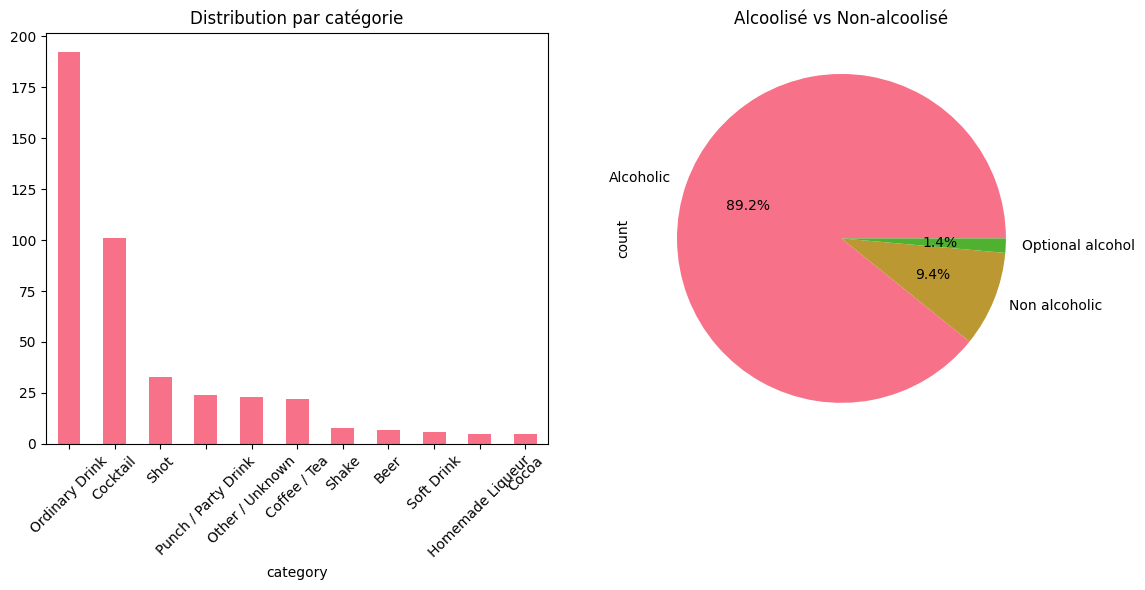

In [17]:
# Distribution des catégories
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
cocktails_df['category'].value_counts().plot(kind='bar')
plt.title('Distribution par catégorie')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
cocktails_df['alcoholic'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Alcoolisé vs Non-alcoolisé')

plt.tight_layout()
plt.show()

INFO:src.data.collectors:Trouvé 293 ingrédients uniques


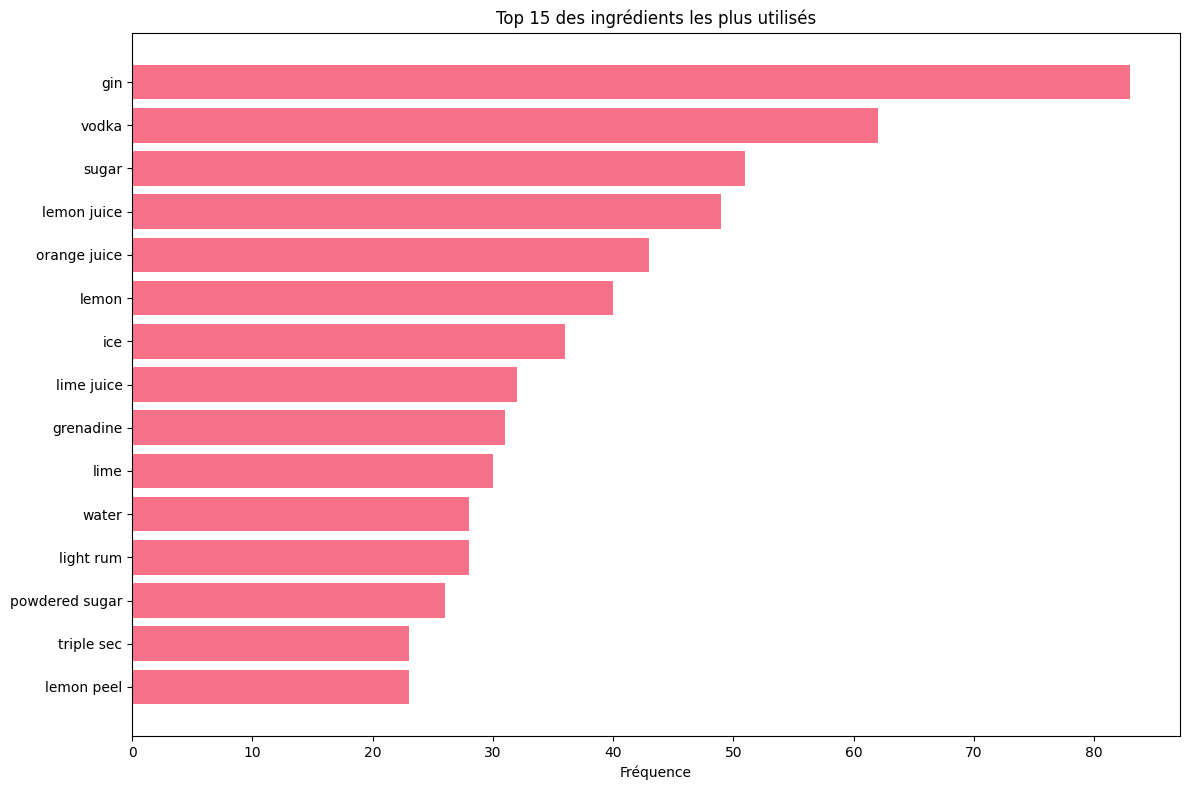


Nombre total d'ingrédients uniques: 293


In [18]:
# Analyse des ingrédients
ingredients_df = processor.extract_ingredients_df(cocktails_df)

plt.figure(figsize=(12, 8))
top_ingredients = ingredients_df.head(15)
plt.barh(top_ingredients['name'], top_ingredients['frequency'])
plt.title('Top 15 des ingrédients les plus utilisés')
plt.xlabel('Fréquence')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nNombre total d'ingrédients uniques: {len(ingredients_df)}")

## 4. Exploration d'un cocktail spécifique

In [22]:
# Regarder un cocktail en détail
if len(cocktails_df) > 0:
    sample_cocktail = cocktails_df.iloc[5]
    
    print(f"🍸 {sample_cocktail['name']}")
    print(f"Catégorie: {sample_cocktail['category']}")
    print(f"Type: {sample_cocktail['alcoholic']}")
    print(f"Verre: {sample_cocktail['glass']}")
    print("\nIngrédients:")
    
    for ingredient, measurement in zip(sample_cocktail['ingredients'], sample_cocktail['measurements']):
        print(f"- {measurement} {ingredient}")
    
    print(f"\nInstructions: {sample_cocktail['instructions'][:200]}...")

🍸 Adam
Catégorie: Ordinary Drink
Type: Alcoholic
Verre: Cocktail glass

Ingrédients:
- 2 oz dark rum
- 1 oz lemon juice
- 1 tsp grenadine

Instructions: In a shaker half-filled with ice cubes, combine all of the ingredients. Shake well. Strain into a cocktail glass....


In [28]:
import os
import json
#
# Filtrer seulement les cocktails alcoolisés ET de catégorie "Cocktail"
cocktail_type = cocktails_df[
    (cocktails_df['alcoholic'] == 'Alcoholic') & 
    (cocktails_df['category'] == 'Cocktail')
].copy()

# Créer un nouveau DataFrame avec seulement les informations essentielles
data_processed = []

for _, cocktail in cocktail_type.iterrows():
    cocktail_data = {
        'name': cocktail['name'],
        'ingredients': cocktail['ingredients'],
        'measurements': cocktail['measurements']
    }
    data_processed.append(cocktail_data)

# Convertir en DataFrame
data_processed = pd.DataFrame(data_processed)

print(f"Créé un dataset avec {len(data_processed)} cocktails de type 'Cocktail' alcoolisés")

# Créer le dossier data/processed s'il n'existe pas
os.makedirs('../data/processed', exist_ok=True)

# Sauvegarder en CSV
csv_path = '../data/processed/cocktails_type_dataset.csv'
data_processed.to_csv(csv_path, index=False)
print(f"\n✅ Dataset sauvegardé en CSV: {csv_path}")

# Sauvegarder aussi en JSON pour faciliter la manipulation des listes d'ingrédients
json_path = '../data/processed/cocktails_type_dataset.json'
data_processed.to_json(json_path, orient='records', indent=2)
print(f"✅ Dataset sauvegardé en JSON: {json_path}")

print("\nPremières lignes du dataset traité:")
data_processed.head()

Créé un dataset avec 97 cocktails de type 'Cocktail' alcoolisés

✅ Dataset sauvegardé en CSV: ../data/processed/cocktails_type_dataset.csv
✅ Dataset sauvegardé en JSON: ../data/processed/cocktails_type_dataset.json

Premières lignes du dataset traité:


,name,ingredients,measurements
0,A1,"[gin, grand marnier, lemon juice, grenadine]","[1 3/4 shot, 1 Shot, 1/4 Shot, 1/8 Shot]"
1,Ace,"[gin, grenadine, heavy cream, milk, egg white]","[2 shots, 1/2 shot, 1/2 shot, 1/2 shot, 1/2 Fr..."
2,Addison,"[gin, vermouth]","[1 1/2 shot, 1 1/2 shot]"
3,Aviation,"[gin, lemon juice, maraschino liqueur]","[4.5 cl, 1.5 cl, 1.5 cl]"
4,Addington,"[sweet vermouth, dry vermouth, soda water]","[2 shots, 1 shot, Top up with]"
